# CPS600 - Python Programming for Finance 
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

# Visualization (& Munging)

###  October 2, 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
%matplotlib inline

## Some `DataFrame`s

First, we take a look at the `pandas` library and its `DataFrame` objects.

Well, `DataFrame`s actually start with `Series`.

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Now we'll create a `DataFrame` having a datetime index. First, the index, which is an object in its own right.

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.465022,0.234529,-0.384231,-0.565364
2013-01-02,-0.549803,0.231615,-0.036907,0.184392
2013-01-03,-0.999695,-0.413057,1.421290,-2.434048
2013-01-04,-0.920407,-0.108558,-0.722845,-0.098361
2013-01-05,0.450163,0.496594,1.027206,-0.180638
2013-01-06,0.621499,1.144081,0.044325,-0.821140


Creating a `DataFrame` from a dictionary.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Note that these are different from arrays in at least one important way:

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

We can look at attributes and methods using *tab completion*

In [7]:
type(df2.A)

pandas.core.series.Series

Let's look at a piece of it.

In [8]:
df.head(2)

,A,B,C,D
2013-01-01,1.465022,0.234529,-0.384231,-0.565364
2013-01-02,-0.549803,0.231615,-0.036907,0.184392


In [9]:
g = df.tail(1)

In [10]:
g['A'] = 1

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df

,A,B,C,D
2013-01-01,1.465022,0.234529,-0.384231,-0.565364
2013-01-02,-0.549803,0.231615,-0.036907,0.184392
2013-01-03,-0.999695,-0.413057,1.421290,-2.434048
2013-01-04,-0.920407,-0.108558,-0.722845,-0.098361
2013-01-05,0.450163,0.496594,1.027206,-0.180638
2013-01-06,0.621499,1.144081,0.044325,-0.821140


In [12]:
g

,A,B,C,D
2013-01-06,1,1.144081,0.044325,-0.82114


The *index* keeps track of the rows...

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

And the columns, for that matter

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [16]:
df.values

array([[ 1.4650225 ,  0.23452948, -0.38423129, -0.56536416],
       [-0.54980288,  0.231615  , -0.03690731,  0.18439229],
       [-0.99969533, -0.4130568 ,  1.42129016, -2.4340478 ],
       [-0.92040748, -0.10855807, -0.72284472, -0.09836052],
       [ 0.45016261,  0.49659396,  1.02720622, -0.1806384 ],
       [ 0.62149853,  1.14408072,  0.04432496, -0.82113966]])

The `describe` method provides summary statistics.

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.011130,0.264201,0.224806,-0.652526
std,0.988259,0.534372,0.830115,0.942344
min,-0.999695,-0.413057,-0.722845,-2.434048
25%,-0.827756,-0.023515,-0.297400,-0.757196
50%,-0.049820,0.233072,0.003709,-0.373001
75%,0.578665,0.431078,0.781486,-0.118930
max,1.465022,1.144081,1.421290,0.184392


Taking the transpose is easy:

In [18]:
df.T.describe()

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.187489,-0.042676,-0.606377,-0.462543,0.448331,0.247191
std,0.917961,0.357774,1.596234,0.422426,0.494312,0.842022
min,-0.565364,-0.549803,-2.434048,-0.920407,-0.180638,-0.821140
25%,-0.429515,-0.165131,-1.358283,-0.772235,0.292462,-0.172041
50%,-0.074851,0.073742,-0.706376,-0.415701,0.473378,0.332912
75%,0.542153,0.196198,0.045530,-0.106009,0.629247,0.752144
max,1.465022,0.231615,1.421290,-0.098361,1.027206,1.144081


We can sort by the rows

In [19]:
df.sort_index(axis=1, ascending=False) #Returning a copy

,D,C,B,A
2013-01-01,-0.565364,-0.384231,0.234529,1.465022
2013-01-02,0.184392,-0.036907,0.231615,-0.549803
2013-01-03,-2.434048,1.421290,-0.413057,-0.999695
2013-01-04,-0.098361,-0.722845,-0.108558,-0.920407
2013-01-05,-0.180638,1.027206,0.496594,0.450163
2013-01-06,-0.821140,0.044325,1.144081,0.621499


We can sort by a specific column (that we name)

In [20]:
df.sort_values(by='B') #Returning a copy

,A,B,C,D
2013-01-03,-0.999695,-0.413057,1.421290,-2.434048
2013-01-04,-0.920407,-0.108558,-0.722845,-0.098361
2013-01-02,-0.549803,0.231615,-0.036907,0.184392
2013-01-01,1.465022,0.234529,-0.384231,-0.565364
2013-01-05,0.450163,0.496594,1.027206,-0.180638
2013-01-06,0.621499,1.144081,0.044325,-0.821140


### Selection

Here are two different ways to ask for the same column (sort of)

In [21]:
type(df['A'])

pandas.core.series.Series

In [22]:
df.A

2013-01-01    1.465022
2013-01-02   -0.549803
2013-01-03   -0.999695
2013-01-04   -0.920407
2013-01-05    0.450163
2013-01-06    0.621499
Freq: D, Name: A, dtype: float64

This slices the rows:

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,1.465022,0.234529,-0.384231,-0.565364
2013-01-02,-0.549803,0.231615,-0.036907,0.184392
2013-01-03,-0.999695,-0.413057,1.421290,-2.434048


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.549803,0.231615,-0.036907,0.184392
2013-01-03,-0.999695,-0.413057,1.421290,-2.434048
2013-01-04,-0.920407,-0.108558,-0.722845,-0.098361


More expressive selections are possible using `.loc`

In [25]:
df.loc[dates[0]]

A    1.465022
B    0.234529
C   -0.384231
D   -0.565364
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.465022,0.234529
2013-01-02,-0.549803,0.231615
2013-01-03,-0.999695,-0.413057
2013-01-04,-0.920407,-0.108558
2013-01-05,0.450163,0.496594
2013-01-06,0.621499,1.144081


In [27]:
type(df.loc['20130102':'20130104',['A','B']])

pandas.core.frame.DataFrame

In [28]:
type(df.loc['20130102',['A','B']])

pandas.core.series.Series

A single 'entry'

In [29]:
type(df.loc[dates[0],'A'])

numpy.float64

Equivalently,

In [30]:
df.at[dates[0],'A']

1.465022498598412

We can also select by location via `.iloc'

In [31]:
df.iloc[3]

A   -0.920407
B   -0.108558
C   -0.722845
D   -0.098361
Name: 2013-01-04 00:00:00, dtype: float64

In [32]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.920407,-0.108558
2013-01-05,0.450163,0.496594


In [33]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.549803,-0.036907
2013-01-03,-0.999695,1.421290
2013-01-05,0.450163,1.027206


In [34]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.549803,0.231615,-0.036907,0.184392
2013-01-03,-0.999695,-0.413057,1.421290,-2.434048


In [35]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.234529,-0.384231
2013-01-02,0.231615,-0.036907
2013-01-03,-0.413057,1.421290
2013-01-04,-0.108558,-0.722845
2013-01-05,0.496594,1.027206
2013-01-06,1.144081,0.044325


Again, accessing a single entry.

In [36]:
df.iloc[1,1]

0.2316150016774707

In [37]:
df.iat[1,1]

0.2316150016774707

Now it gets more interesting. This is where we can does SQLesque things.

In [38]:
df[df.B > 0]

,A,B,C,D
2013-01-01,1.465022,0.234529,-0.384231,-0.565364
2013-01-02,-0.549803,0.231615,-0.036907,0.184392
2013-01-05,0.450163,0.496594,1.027206,-0.180638
2013-01-06,0.621499,1.144081,0.044325,-0.821140


In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,1.465022,0.234529,NaN,NaN
2013-01-02,NaN,0.231615,NaN,0.184392
2013-01-03,NaN,NaN,1.421290,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,0.450163,0.496594,1.027206,NaN
2013-01-06,0.621499,1.144081,0.044325,NaN


Another way to filter

In [40]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

In [41]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.999695,-0.413057,1.421290,-2.434048,two
2013-01-05,0.450163,0.496594,1.027206,-0.180638,four


### Setting

In [42]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [43]:
df['F'] = s1 # Adding a column (called F)

In [44]:
df.at[dates[0],'A'] = 0 # Changing an entry

In [45]:
df.iat[0,1] = 0 # Also changing an entry

In [46]:
df.loc[:,'D'] = np.array([5] * len(df))

In [47]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.384231,5,NaN
2013-01-02,-0.549803,0.231615,-0.036907,5,1.0
2013-01-03,-0.999695,-0.413057,1.421290,5,2.0
2013-01-04,-0.920407,-0.108558,-0.722845,5,3.0
2013-01-05,0.450163,0.496594,1.027206,5,4.0
2013-01-06,0.621499,1.144081,0.044325,5,5.0


Here, setting values in places where a certain condition holds

In [48]:
df2 = df.copy()

In [49]:
df2[df2 > 0] = -df2

In [50]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.384231,-5,NaN
2013-01-02,-0.549803,-0.231615,-0.036907,-5,-1.0
2013-01-03,-0.999695,-0.413057,-1.421290,-5,-2.0
2013-01-04,-0.920407,-0.108558,-0.722845,-5,-3.0
2013-01-05,-0.450163,-0.496594,-1.027206,-5,-4.0
2013-01-06,-0.621499,-1.144081,-0.044325,-5,-5.0


In [51]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

We can drop the missing values (`np.nan`).

In [52]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.384231,5,NaN,1.0
2013-01-02,-0.549803,0.231615,-0.036907,5,1.0,1.0
2013-01-03,-0.999695,-0.413057,1.421290,5,2.0,NaN
2013-01-04,-0.920407,-0.108558,-0.722845,5,3.0,NaN


In [53]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.549803,0.231615,-0.036907,5,1.0,1.0


Just a single row that will work.

Alternatively, we could fill in the missing values

In [54]:
df1.fillna(value=5, inplace=True)

Or, we might be interested in a dataframe of bools

In [55]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,False,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,False
2013-01-04,False,False,False,False,False,False


### Statistics

In [56]:
df.mean(), 
#df.mean(1)

(A   -0.233041
 B    0.225112
 C    0.224806
 D    5.000000
 F    3.000000
 dtype: float64,)

### Apply

We can apply a function row-wise (or column-wise) to a data frame

In [57]:
df.apply(lambda x: x.max() - x.min(),axis=1)

2013-01-01    5.384231
2013-01-02    5.549803
2013-01-03    5.999695
2013-01-04    5.920407
2013-01-05    4.549837
2013-01-06    4.955675
Freq: D, dtype: float64

### Merge, join & concatenate

While we're at it, here is a handy way to generate a random data frame quickly:

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))

Next we create a list of data frames - some pieces of the original.

In [59]:
pieces = [df[:3], df[3:7], df[7:]]

Then we concatenate them.

In [60]:
df

,0,1,2,3
0,0.386834,0.154091,0.011401,-0.635534
1,-0.976976,0.260724,2.516930,0.284506
2,0.641194,-0.362159,-0.844397,-2.120970
3,-0.568114,-1.362117,0.352408,-0.038260
4,-1.186810,0.490961,0.110021,-0.773439
5,0.152807,-0.524024,0.589170,0.334037
6,-0.626012,-0.930282,0.573032,0.271172
7,-0.881901,-1.744207,0.900348,1.198056
8,-0.472069,1.633982,0.103566,0.210404
9,-0.000886,-0.055761,-0.355154,-0.470609


In [61]:
pd.concat(pieces) == df

,0,1,2,3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


We can also join two separate tables that share some kind of a column

In [62]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [63]:
pd.merge(left, right, on='key',how='inner')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another case to consider is *appending*

In [64]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [65]:
s = df.iloc[3]
s

A   -1.253841
B   -0.262821
C   -0.959444
D    0.018418
Name: 3, dtype: float64

In [66]:
s

A   -1.253841
B   -0.262821
C   -0.959444
D    0.018418
Name: 3, dtype: float64

In [67]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.061931,1.129628,0.920011,0.598262
1,-0.591283,-0.628514,-1.394255,1.443494
2,-0.970589,-0.196271,1.290543,-0.802274
3,-1.253841,-0.262821,-0.959444,0.018418
4,-0.298546,1.747524,-0.216886,0.236003
5,0.333445,-0.800730,0.150774,2.442429
6,-0.199862,-1.095070,-1.531321,-0.711386
7,-0.214436,-0.253389,0.725640,-1.584496
8,-1.253841,-0.262821,-0.959444,0.018418


### Split-Apply-Combine

No demo of SQLesque operations would be complete without a *grouping* example

In [68]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})

In [69]:
df.groupby('A').sum()

,C,D
A,,
bar,1.140447,2.255871
foo,-4.222403,0.519880


In [70]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.156761  0.412153
    three  0.290158  1.184943
    two    0.693528  0.658775
foo one   -1.502739  1.321625
    three -0.066332 -0.246538
    two   -2.653332 -0.555206

## Two-Dimensional Plotting

### One-Dimensional Data Set

In [71]:
np.random.seed(1000)
# Seed the random number generator with a fixed value.
# This way, you'll always get the same random number sequence.
# we generate 20 standard normally distributed (pseudo)random numbers as a NumPy ndarray
y = np.random.standard_normal(20) # returns ndarray

In [72]:
y

array([-0.8044583 ,  0.32093155, -0.02548288,  0.64432383, -0.30079667,
        0.38947455, -0.1074373 , -0.47998308,  0.5950355 , -0.46466753,
        0.66728131, -0.80611561, -1.19606983, -0.40596016, -0.18237734,
        0.10319289, -0.13842199,  0.70569237,  1.27179528, -0.98674733])

20


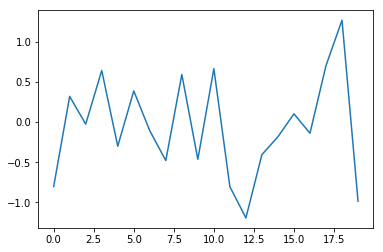

In [73]:
print (len(y))
x = range(len(y))
# x values: a list or an array containing the x coordinates 
# y values: a list or an array containing the y coordinates

plt.plot(x, y)
# title: Plot given x- and y-values

In [74]:
x

range(0, 20)

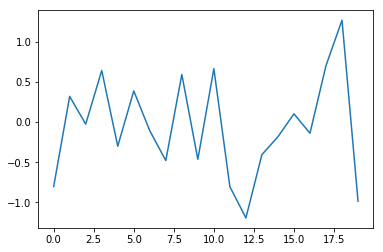

In [75]:
plt.plot(y)
# y is an ndarray. Index is taken as an respective data.
# title: Plot given data as 1d-array

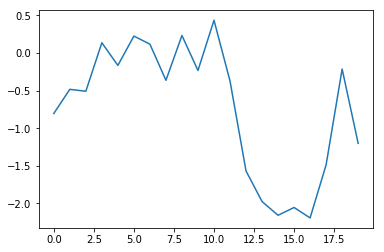

In [76]:
plt.plot(y.cumsum()) 
# cumulative sum
# title: Plot given a 1d-array with method attached

(-0.9500000000000001, 19.95, -2.322818663749045, 0.5655085808655865)

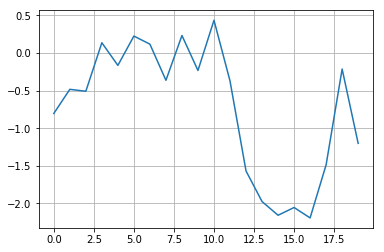

In [77]:
plt.plot(y.cumsum())
plt.grid(True)  # adds a grid
plt.axis('tight')  # adjusts the axis ranges
# axis : on , off, equal, scaled, tight, image, [xmin, xmax,ymin, ymax]
# title: Plot with grid and tight axes

<table> 
<tr><td> Parameter</td> <td> Description </td></tr>
<tr><td>on </td> <td>   Turns axis lines and labels on</td></tr>
<tr><td>off   </td> <td>   Turns axis lines and labels off</td></tr>
<tr><td>equal </td> <td>   Leads to equal scaling</td></tr>
<tr><td>scaled </td> <td> Equal scaling via dimension changes</td></tr>
<tr><td>tight  </td> <td>  Makes all data visible (tightens limits)</td></tr>
<tr><td>image </td> <td>   Makes all data visible (with data limits)</td></tr>
<tr><td>[xmin, xmax, ymin, ymax] </td> <td>  Sets limits to given ( list of) values</td></tr>
</table>

(-3.1915310617211072, 1.4342209788376488)

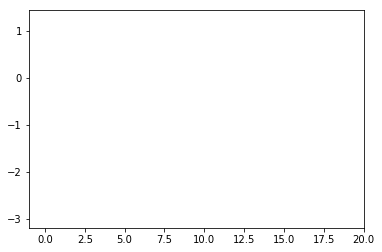

In [79]:
#  plt.plot(y.cumsum())
plt.grid(False)
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum()) - 1,
         np.max(y.cumsum()) + 1)
# title: Plot with custom axes limits

In [ ]:
plt.figure(figsize=(7, 4))     # size of the figure x=7 units, y = 4 units
plt.plot(y.cumsum(), 'b', lw=1.5)  # blue, line width 1.5 points
plt.plot(y.cumsum(), 'ro')     # red circle marker
plt.grid(True)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
# colors: b (blue), g (green), r (red), y (yellow), 
#         w (white), c (cyan), m (magenta), k (black)
# title: Plot with typical labels

### Two-Dimensional Data Set

In [11]:
np.random.seed(2000)
y = np.random.standard_normal((20, 2)).cumsum(axis=0)

#  2 dimensional sample data set
# the code generates  ndarray of shape  20x2 
#     with standard-normally distributed  pseudo random numbers
# cumulative sum is calculated along the first dimention

In [ ]:
y

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(y, lw=1.5)

#plt.plot(y, 'ro')      # Circle marker
plt.plot(y, 'rD')       # Diamond marker
#plt.plot(y, 'r*')      # start marker
                        # rey also ^ 1 2 3 4 s p + x | and more

plt.grid(True)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
# title: Plot with two data sets

In [14]:
#    -    Solid line style
#    —    Dashed line style
#    -.   Dash-dot line style
#    :    Dotted line style
#    .    Point marker
#    ,    Pixel marker
#    o    Circle marker
#    v    Triangle_down marker
#    ^    Triangle_up marker
#    <    Triangle_left marker
#    >    Triangle_right marker
#    1    Tri_down marker
#    2    Tri_up marker
#    3    Tri_left marker
#    4    Tri_right marker
#    s    Square marker
#    p    Pentagon marker
#    *    Star marker
#    h    Hexagon1 marker
#    H    Hexagon2 marker
#    +    Plus marker
#    x    X marker
#    D    Diamond marker
#    d    Thin diamond marker
#    |    Vline marker

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(y[:, 0], lw=1.5, label='1st')  # first column
plt.plot(y[:, 1], lw=1.5, label='2nd')  # second column
plt.plot(y, 'ro')  # red circle markers
plt.grid(True)
plt.legend(loc=0)  # location - 0= best possible ; 0-10
plt.axis('tight')  # tight limits
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
# title: Plot with labeled data sets

In [16]:
#    Empty    Automatic
#    0        Best possible
#    1        Upper right
#    2        Upper left
#    3        Lower left
#    4        Lower right
#    5        Right
#    6        Center left
#    7        Center right
#    8        Lower center
#    9        Upper center
#    10       Center

In [ ]:
y[:, 0] = y[:, 0] * 100
plt.figure(figsize=(7, 4))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
# title: Plot with two differently scaled data sets

In [ ]:
fig, ax1 = plt.subplots()  # returns axis objects
# plot first data set using the first (left) axix
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=8) # location: lower-center
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
ax2 = ax1.twinx()   #generates twin axix
# plot the second data set using the second (right) axis
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0) # location best possible
plt.ylabel('value 2nd')
# title: Plot with two data sets and two y-axes

In [ ]:
plt.figure(figsize=(7, 5))
plt.subplot(211)  # picture: 2 rows, 1 column, 1 -figure number
plt.plot(y[:, 0], lw=1.5, label='1st') # first data set
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=0) # location - best possible
plt.axis('tight')
plt.ylabel('value')
plt.title('A Simple Plot')
plt.subplot(212)  # picture: 2 rows, 1 column, 2 -figure number
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')  #second data set
plt.plot(y[:, 1], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
# title: Plot with two sub-plots

In [ ]:
plt.figure(figsize=(9, 4))
plt.subplot(121)  # picture: 1 row, 2 columns, 1 -figure number
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')

plt.subplot(122)   # picture: 1 row, 1 columns, 2 -figure number
plt.bar(np.arange(len(y)), y[:, 1], width=0.5,
        color='g', label='2nd')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.title('2nd Data Set')
# title: Plot combining line/point sub-plot with bar sub-plot
# size: 80

### Other Plot Styles

In [ ]:
y = np.random.standard_normal((1000, 2))
# 2 dimensional data set

In [ ]:
y

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')
# title: Scatter plot via +plot+ function

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')
# title: Scatter plot via +scatter+ function

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')
# title: Scatter plot via +scatter+ function

In [25]:
c = np.random.randint(0, 10, len(y))
# return random integers from low (inclusive) to high (exclusive)
# returns numpy ndarray with len(y) items

In [ ]:
c

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y[:, 0], y[:, 1], c=c, marker='o') 
# c=c is a color parameter
plt.colorbar()   # add color bar
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')
# title: Scatter plot with third dimension

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')
# title: Histogram for two data sets

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
            stacked=True, bins=20)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')
# title: Stacked histogram for two data sets

In [ ]:
y = np.random.standard_normal((1000, 2))
# 2 dimensional data set

fig, ax = plt.subplots(figsize=(7, 4))
plt.boxplot(y)
plt.grid(True)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

In [ ]:
from matplotlib.patches import Polygon
def func(x):
    return 0.5 * np.exp(x) + 1

a, b = 0.5, 1.5  # integral limits
x = np.linspace(0, 2)
y = func(x)

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

# Illustrate the integral value, i.e. the area under the function
# between lower and upper limit
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 1, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=30)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))
plt.grid(True)
# title: Exponential function, integral area and Latex labels
# size: 60

In [ ]:
print(x)
print (y)

In [ ]:
print(verts)

## Financial Plots

In [9]:
import numpy as np
import pandas as pd
import mpl_finance as mpf

In [44]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2014, 2, 26)

# Getting some quotes data
quotes = pd.read_csv('yahoofinance-AAPL.csv')

# We need datetime values for filtering
quotes['Date'] = pd.to_datetime(quotes.Date.apply(lambda x: ''.join(x.split('-'))).values)

# Here filtering
quotes = quotes[(quotes['Date'] > start) & (quotes['Date'] < end)]

In [47]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 3, 31)

quotes = pd.read_csv('yahoofinance-GOOG.csv')

# We need datetime values for filtering
quotes['Date'] = pd.to_datetime(quotes.Date.apply(lambda x: ''.join(x.split('-'))).values)

# Here filtering
quotes = quotes[(quotes['Date'] > start) & (quotes['Date'] < end)]

y= np.array(quotes)

## 3d Plotting

In [59]:
X = np.linspace(50, 150, 24)
Y = np.linspace(0.5, 2.5, 24)
X, Y = np.meshgrid(X, Y)
# cretae 2 dimentional  coordinate system
# numpy meshgrid function generates such a system 
#   out of 2 one dimentional ndarray objects

In [ ]:
X[:2]

In [63]:
Z = (X - 100) ** 2 / (100 * X) / Y

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')

fig.colorbar(surf, shrink=0.5, aspect=5)
# title: 3d surface plot for (fake) implied volatilities
# size: 70

In [ ]:
#    Parameters for plot_surface
#    ===========================
#    Parameter     Description
#    ---------     -----------
#    X, Y, Z       Data values as 2D arrays
#    rstride       Array row stride (step size)
#    cstride       Array column stride (step size)
#    color         Color of the surface patches
#    cmap          A colormap for the surface patches
#    facecolors    Face colors for the individual patches
#    norm          An instance of Normalize to map values to colors
#    vmin          Minimum value to map
#    vmax          Maximum value to map
#    shade         Whether to shade the face colors

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)

ax.scatter(X, Y, Z, zdir='z', s=25, c='b',
           marker='^', cmap=plt.cm.coolwarm)

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
# title: 3d scatter plot for (fake) implied volatilities
# size: 70

## Further Reading

In [ ]:
# %load http://matplotlib.org/mpl_examples/pie_and_polar_charts/pie_demo_features.py
"""
Demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

    * slice labels
    * auto-labeling the percentage
    * offsetting a slice with "explode"
    * drop-shadow
    * custom start angle

Note about the custom start angle:

The default ``startangle`` is 0, which would start the "Frogs" slice on the
positive x-axis. This example sets ``startangle = 90`` such that everything is
rotated counter-clockwise by 90 degrees, and the frog slice starts on the
positive y-axis.
"""
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

fig = plt.figure()
ax = fig.gca()
import numpy as np

ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 0), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 0), frame=True)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Sunny", "Cloudy"])
ax.set_yticklabels(["Dry", "Rainy"])
ax.set_xlim((-0.5, 1.5))
ax.set_ylim((-0.5, 1.5))

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.set_aspect('equal')

plt.show()


In [ ]:
import matplotlib.pyplot as plot 
import matplotlib.image as image 
img = image.imread('isabelle.png')  
# replace isabelle.png by your own image
plot.imshow( img) 
plot.show()

* The home page of matplotlib is, of course, the best starting point:   http://matplotlib.org.
* There’s a gallery with many useful examples: http://matplotlib.org/gallery.html.
* A tutorial for 2D plotting is found here:    http://matplotlib.org/users/pyplot_tutorial.html.
* Another one for 3D plotting is here:         http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html.